# Data Preprocessing

## Handling Duplicate 


In [14]:
def preprocessing(df):
    """"
    Objective :
    Function for preprocessing data, known missing, duplicated values and basic stastics every column in dataframe and duplicated row
    df is dataframe
    """
    try:
        import pandas as pd
        variables = pd.DataFrame(columns=['Variable','Number of unique values','Percent of Null(%)','Number of Duplicated','Type','Values'])
        for i, var in enumerate(df.columns):
            variables.loc[i] = [var, df[var].nunique(),df[var].isnull().sum()/df.shape[0]*100,df[var].duplicated(keep=False).sum(),df[var].dtypes,df[var].unique()]
        return (variables.set_index('Variable'))
    except:
        print('ada kesalahan penginputan')

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
df = pd.read_csv('/content/gdrive/My Drive/Final_Project_Kelompok_8/Travel.csv')

In [17]:
df.duplicated(subset='CustomerID').sum()

0

In [18]:
df['Gender'] = df['Gender'].replace('Fe Male','Female')
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

## Handling Missing Value

In [19]:
preprocessing(df)

,Number of unique values,Percent of Null(%),Number of Duplicated,Type,Values
Variable,,,,,
CustomerID,4888,0.000000,0,int64,"[200000, 200001, 200002, 200003, 200004, 20000..."
ProdTaken,2,0.000000,4888,int64,"[1, 0]"
Age,44,4.623568,4888,float64,"[41.0, 49.0, 37.0, 33.0, nan, 32.0, 59.0, 30.0..."
TypeofContact,2,0.511457,4888,object,"[Self Enquiry, Company Invited, nan]"
CityTier,3,0.000000,4888,int64,"[3, 1, 2]"
DurationOfPitch,34,5.135025,4886,float64,"[6.0, 14.0, 8.0, 9.0, 30.0, 29.0, 33.0, 22.0, ..."
Occupation,4,0.000000,4888,object,"[Salaried, Free Lancer, Small Business, Large ..."
Gender,2,0.000000,4888,object,"[Female, Male]"
NumberOfPersonVisiting,5,0.000000,4888,int64,"[3, 2, 1, 4, 5]"


In [20]:
df_drop = df.dropna()
print('jumlah baris yang memiliki null value',df.shape[0]-df_drop.shape[0])
print('baris yang memiliki null value',(1-df_drop.shape[0]/df.shape[0])*100,'%')

jumlah baris yang memiliki null value 760
baris yang memiliki null value 15.548281505728312 %


**Data Insight**

Kolom yang memiliki null value:
  1. Age
  2. TypeofContact
  3. DurationOfPitch
  4. NumberOfFollowups
  5. PreferredPropertyStar
  6. NumberOfTrips
  7. NumberOfChildrenVisiting
  8. MonthlyIncome

Distribusi numerik :
  1. Age (Memiliki distribusi normal)
  2. DurationOfPitch (Memiliki distribusi positive skewness)
  3. MonthlyOfIncome (distribusi positive skewness)
  
  Tindakan :
*   Imputasi numerikal dengan median
*   Imputasi dengan designation (liat distribusi antara umur dan designation)
*   Imputasi kategorikal bisa modus
*   Imputasi kategorikal bisa korelasi dengan variabel lain
*   NumberOfTrips nilai null disebabkan karena customer tidak pernah ikut trip
*   NumberOfFollowups nilai null disebabkan karena customer belum dilakukan followup kembali setelah pitching
*   NumberOfChildrenVisitting nilai null disebabkan customer tidak punya anak yang ikut







In [21]:
categorical = ['TypeofContact','Occupation','ProductPitched','MaritalStatus','Designation']
num_cat = ['ProdTaken','Gender','NumberOfPersonVisiting','NumberOfFollowups','Passport','PitchSatisfactionScore','OwnCar','NumberOfChildrenVisiting','CityTier']
numeric = ['DurationOfPitch','Age']

In [22]:
df['DurationOfPitch'].fillna(df['DurationOfPitch'].median(),inplace=True)

In [23]:
df['TypeofContact'].fillna(df['TypeofContact'].mode(),inplace=True)

In [24]:
df['Age'] = df['Age'].fillna(df['Age'].median())

In [25]:
df['NumberOfFollowups'] = df['NumberOfFollowups'].fillna(0)

In [26]:
df['PreferredPropertyStar'].fillna(df['PreferredPropertyStar'].mode(),inplace=True)

In [27]:
df['NumberOfTrips'] = df['NumberOfTrips'].fillna(0)

In [28]:
df['NumberOfChildrenVisiting'] = df['NumberOfChildrenVisiting'].fillna(0)

In [29]:
df['Designation'].value_counts()

Executive         1842
Manager           1732
Senior Manager     742
AVP                342
VP                 230
Name: Designation, dtype: int64

In [30]:
df['MonthlyIncome'] = df['MonthlyIncome'].fillna(df['MonthlyIncome'].median())

In [31]:
df['TypeofContact'] = df['TypeofContact'].replace(np.nan,'Self Enquiry')

In [32]:
df['PreferredPropertyStar'] = df['PreferredPropertyStar'].replace(np.nan,3)

In [33]:
preprocessing(df)

,Number of unique values,Percent of Null(%),Number of Duplicated,Type,Values
Variable,,,,,
CustomerID,4888,0.0,0,int64,"[200000, 200001, 200002, 200003, 200004, 20000..."
ProdTaken,2,0.0,4888,int64,"[1, 0]"
Age,44,0.0,4888,float64,"[41.0, 49.0, 37.0, 33.0, 36.0, 32.0, 59.0, 30...."
TypeofContact,2,0.0,4888,object,"[Self Enquiry, Company Invited]"
CityTier,3,0.0,4888,int64,"[3, 1, 2]"
DurationOfPitch,34,0.0,4886,float64,"[6.0, 14.0, 8.0, 9.0, 30.0, 29.0, 33.0, 22.0, ..."
Occupation,4,0.0,4888,object,"[Salaried, Free Lancer, Small Business, Large ..."
Gender,2,0.0,4888,object,"[Female, Male]"
NumberOfPersonVisiting,5,0.0,4888,int64,"[3, 2, 1, 4, 5]"


## Handling Outlier

Outlier :

  1. Kolom DurationOfPitch memiliki outlier 2 data dengan boxplot karena jauh Q3
  2. MonthlyIncome memiliki banyak outlier

In [34]:
outlier = ['DurationOfPitch','MonthlyIncome']

### Z-score

In [35]:
print(f'Jumlah baris sebelum memfilter outlier: {len(df)}')
from scipy import stats
filtered_entries = np.array([True] * len(df))

for col in outlier:
    zscore = abs(stats.zscore(df[col])) # hitung absolute z-scorenya
    filtered_entries = (zscore < 3) & filtered_entries # keep yang kurang dari 3 absolute z-scorenya

df_clean_z = df    
df_clean_z = df_clean_z[filtered_entries] # filter, cuma ambil yang z-scorenya dibawah 3

print(f'Jumlah baris setelah memfilter outlier: {len(df)}')


Jumlah baris sebelum memfilter outlier: 4888
Jumlah baris setelah memfilter outlier: 4888


### IQR

In [36]:
#Outlier dapat dihilangkan dengan IQR
def remove_outlier_IQR(df):
    Q1=df.quantile(0.25)
    Q3=df.quantile(0.75)
    IQR=Q3-Q1
    df_final=df[~((df<(Q1-1.5*IQR)) | (df>(Q3+1.5*IQR)))]
    return df_final

In [37]:
Q1 = df['MonthlyIncome'].quantile(0.25)
Q3 = df['MonthlyIncome'].quantile(0.75)
IQR = Q3-Q1
low_limit = Q1 - (1.5*IQR)
high_limit = Q3 + (1.5*IQR)
filtered_entries = ((df['MonthlyIncome']>=low_limit)&(df['MonthlyIncome']<=high_limit))
df_clean_IQR = df
df_clean_IQR = df_clean_IQR[filtered_entries]
df_clean_IQR.shape[0]

4513

In [38]:
Q1 = df_clean_IQR['DurationOfPitch'].quantile(0.25)
Q3 = df_clean_IQR['DurationOfPitch'].quantile(0.75)
IQR = Q3-Q1
low_limit = Q1 - (1.5*IQR)
high_limit = Q3 + (1.5*IQR)
filtered_entries = ((df_clean_IQR['DurationOfPitch']>=low_limit)&(df_clean_IQR['DurationOfPitch']<=high_limit))
df_clean_IQR = df_clean_IQR[filtered_entries]
df_clean_IQR.shape[0]

4511

In [39]:
print('jumlah data yang dipakai',round((df_clean_IQR.shape[0]/df.shape[0])*100,2),'%')

jumlah data yang dipakai 92.29 %


## Encoding

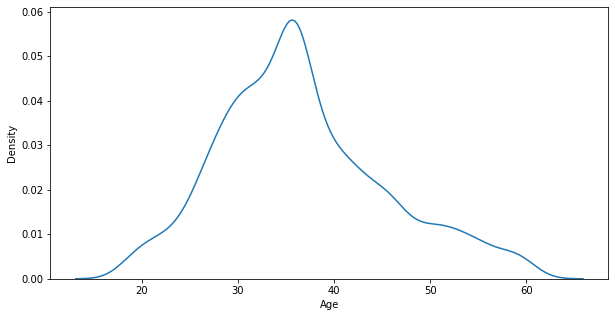

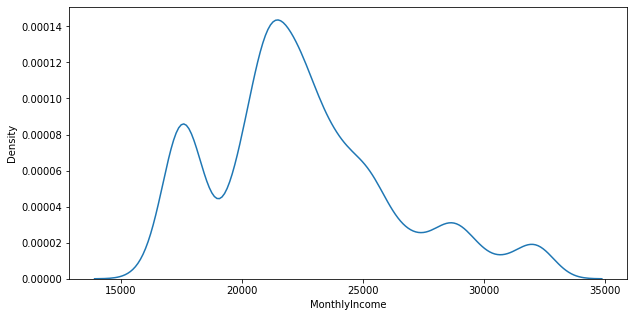

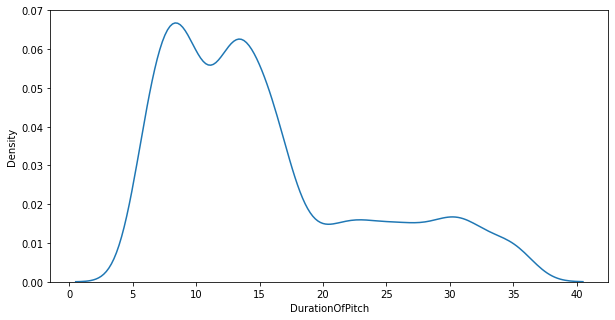

In [40]:
numeric = ['Age','MonthlyIncome','DurationOfPitch']
for j in range (0,len(numeric)):
    num = numeric[j]
    plt.figure(figsize=(10,5))
    sns.kdeplot(data=df_clean_IQR,x=num)

tidak ada data yang skew

In [41]:
preprocessing(df)

,Number of unique values,Percent of Null(%),Number of Duplicated,Type,Values
Variable,,,,,
CustomerID,4888,0.0,0,int64,"[200000, 200001, 200002, 200003, 200004, 20000..."
ProdTaken,2,0.0,4888,int64,"[1, 0]"
Age,44,0.0,4888,float64,"[41.0, 49.0, 37.0, 33.0, 36.0, 32.0, 59.0, 30...."
TypeofContact,2,0.0,4888,object,"[Self Enquiry, Company Invited]"
CityTier,3,0.0,4888,int64,"[3, 1, 2]"
DurationOfPitch,34,0.0,4886,float64,"[6.0, 14.0, 8.0, 9.0, 30.0, 29.0, 33.0, 22.0, ..."
Occupation,4,0.0,4888,object,"[Salaried, Free Lancer, Small Business, Large ..."
Gender,2,0.0,4888,object,"[Female, Male]"
NumberOfPersonVisiting,5,0.0,4888,int64,"[3, 2, 1, 4, 5]"


In [42]:
def onehot_encode(df_clean, columns):
    df_clean = df_clean.copy()
    for column in columns:
        dummies = pd.get_dummies(df_clean[column])
        df_clean = pd.concat([df_clean, dummies], axis=1)
        df_clean.drop(column, axis=1, inplace=True)
    return df_clean

In [43]:
def label_encode(df, columns, orderings):
    df = df.copy()
    for column, ordering in zip(columns, orderings):
        df[column] = df[column].apply(lambda x: ordering.index(x) if str(x) != 'nan' else x)
    return df

In [44]:
onehot = ['Occupation','MaritalStatus','Designation']

In [45]:
X = df_clean_IQR.drop('ProdTaken',axis=1)
y = df_clean_IQR['ProdTaken']

In [46]:
X = onehot_encode(X,onehot)

In [47]:
X = label_encode(X,['TypeofContact'],[['Self Enquiry', 'Company Invited']])
X = label_encode(X,['Gender'],[['Female','Male']])
X = label_encode(X,['ProductPitched'],[['Basic','Standard','Deluxe','Super Deluxe', 'King']])

In [48]:
X

,CustomerID,Age,TypeofContact,CityTier,DurationOfPitch,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,...,Small Business,Divorced,Married,Single,Unmarried,AVP,Executive,Manager,Senior Manager,VP
0,200000,41.0,0,3,6.0,0,3,3.0,2,3.0,...,0,0,0,1,0,0,0,1,0,0
1,200001,49.0,1,1,14.0,1,3,4.0,2,4.0,...,0,1,0,0,0,0,0,1,0,0
2,200002,37.0,0,1,8.0,1,3,4.0,0,3.0,...,0,0,0,1,0,0,1,0,0,0
3,200003,33.0,1,1,9.0,0,2,3.0,0,3.0,...,0,1,0,0,0,0,1,0,0,0
4,200004,36.0,0,1,8.0,1,2,3.0,0,4.0,...,1,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,204883,49.0,0,3,9.0,1,3,5.0,2,4.0,...,1,0,0,0,1,0,0,1,0,0
4884,204884,28.0,1,1,31.0,1,4,5.0,0,3.0,...,0,0,0,1,0,0,1,0,0,0
4885,204885,52.0,0,3,17.0,0,4,4.0,1,4.0,...,0,0,1,0,0,0,0,0,1,0
4886,204886,19.0,0,3,16.0,1,3,4.0,0,3.0,...,1,0,0,1,0,0,1,0,0,0


## Handle Class Imbalance

In [49]:
#Split Train and Test Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=21)
#SMOTE
from imblearn.over_sampling import SMOTE 
smote = SMOTE()
X_train, y_train = smote.fit_resample(X_train, y_train)

In [50]:
y_train.value_counts()

0    2910
1    2910
Name: ProdTaken, dtype: int64

### Scaller

liat dulu distribusi setelah scalling

In [51]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Modelling

In [56]:
features_train = X_train
features_test = X_test
label_train = y_train
label_test = y_test

## Logistic Regression

In [70]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

clf.fit(features_train,label_train)

pred_train = clf.predict(features_train)
pred_test = clf.predict(features_test)
pred_proba = clf.predict_proba(features_test)[:,1]

from sklearn.metrics import accuracy_score
accuracy_train_lr = accuracy_score(pred_train,label_train)
accuracy_test_lr = accuracy_score(pred_test,label_test)

from sklearn.metrics import precision_score
precision_train_lr = precision_score(pred_train,label_train)
precision_test_lr = precision_score(pred_test,label_test)

from sklearn.metrics import recall_score
recall_train_lr = recall_score(pred_train,label_train)
recall_test_lr = recall_score(pred_test,label_test)

from sklearn.metrics import f1_score
f1_train_lr = f1_score(pred_train,label_train)
f1_test_lr = f1_score(pred_test,label_test)

from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(np.array(label_train), clf.predict_proba(features_train)[:,1])
auc_train_lr = metrics.auc(fpr,tpr)

fpr, tpr, _ = metrics.roc_curve(np.array(label_test), clf.predict_proba(features_test)[:,1])
auc_test_lr = metrics.auc(fpr,tpr)
auc_overfitting_lr = auc_test_lr-auc_train_lr

print('accuracy model :',accuracy_test_lr*100,'%')
print('AUC :',auc_test_lr*100,'%')
print('AUC overfitting:',auc_overfitting_lr*100,'%')

accuracy model : 83.83167220376522 %
AUC : 81.97150334399535 %
AUC overfitting: -10.904159437502269 %


## Decision Trees

In [71]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()

clf.fit(features_train,label_train)

pred_train = clf.predict(features_train)
pred_test = clf.predict(features_test)
pred_proba = clf.predict_proba(features_test)[:,1]

from sklearn.metrics import accuracy_score
accuracy_train_dct = accuracy_score(pred_train,label_train)
accuracy_test_dct = accuracy_score(pred_test,label_test)

from sklearn.metrics import precision_score
precision_train_dct = precision_score(pred_train,label_train)
precision_test_dct = precision_score(pred_test,label_test)

from sklearn.metrics import recall_score
recall_train_dct = recall_score(pred_train,label_train)
recall_test_dct = recall_score(pred_test,label_test)

from sklearn.metrics import f1_score
f1_train_dct = f1_score(pred_train,label_train)
f1_test_dct = f1_score(pred_test,label_test)

from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(np.array(label_train), clf.predict_proba(features_train)[:,1])
auc_train_dct = metrics.auc(fpr,tpr)

fpr, tpr, _ = metrics.roc_curve(np.array(label_test), clf.predict_proba(features_test)[:,1])
auc_test_dct = metrics.auc(fpr,tpr)
auc_overfitting_dct = auc_test_dct-auc_train_dct
print('accuracy model :',accuracy_test_dct*100,'%')
print('AUC :',auc_test_dct*100,'%')
print('AUC overfitting :',auc_overfitting_dct )

accuracy model : 81.94905869324474 %
AUC : 72.98059411395602 %
AUC overfitting : -0.2701940588604399


## Naive Baiyes

In [72]:
from sklearn.naive_bayes import GaussianNB 
clf = GaussianNB()

clf.fit(features_train,label_train)

pred_train = clf.predict(features_train)
pred_test = clf.predict(features_test)
pred_proba = clf.predict_proba(features_test)[:,1]


from sklearn.metrics import accuracy_score
accuracy_train_nb = accuracy_score(pred_train,label_train)
accuracy_test_nb = accuracy_score(pred_test,label_test)

from sklearn.metrics import precision_score
precision_train_nb = precision_score(pred_train,label_train)
precision_test_nb = precision_score(pred_test,label_test)

from sklearn.metrics import recall_score
recall_train_nb = recall_score(pred_train,label_train)
recall_test_nb = recall_score(pred_test,label_test)

from sklearn.metrics import f1_score
f1_train_nb = f1_score(pred_train,label_train)
f1_test_nb = f1_score(pred_test,label_test)

from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(np.array(label_train), clf.predict_proba(features_train)[:,1])
auc_train_nb = metrics.auc(fpr,tpr)

fpr, tpr, _ = metrics.roc_curve(np.array(label_test), clf.predict_proba(features_test)[:,1])
auc_test_nb = metrics.auc(fpr,tpr)
auc_overfitting_nb = auc_test_nb-auc_train_nb
print('accuracy model :',accuracy_test_nb*100,'%')
print('AUC :',auc_test_nb*100,'%')
print('AUC overfitting :',auc_overfitting_nb*100,'%' )

accuracy model : 68.54928017718716 %
AUC : 67.088045790545 %
AUC overfitting : -15.046211008500842 %


## Linear SVC

In [74]:
from sklearn.svm import LinearSVC
from sklearn.calibration import CalibratedClassifierCV
clf = LinearSVC()

clf.fit(features_train,label_train)

pred_train = clf.predict(features_train)
pred_test = clf.predict(features_test)

from sklearn.metrics import accuracy_score
accuracy_train_svc = accuracy_score(pred_train,label_train)
accuracy_test_svc = accuracy_score(pred_test,label_test)

from sklearn.metrics import precision_score
precision_train_svc = precision_score(pred_train,label_train)
precision_test_svc = precision_score(pred_test,label_test)

from sklearn.metrics import recall_score
recall_train_svc = recall_score(pred_train,label_train)
recall_test_svc = recall_score(pred_test,label_test)

from sklearn.metrics import f1_score
f1_train_svc = f1_score(pred_train,label_train)
f1_test_svc = f1_score(pred_test,label_test)

from sklearn import metrics
clf_new = CalibratedClassifierCV(clf)
clf_new.fit(features_train,label_train)
pred_proba = clf_new.predict_proba(features_train)[:,1]
fpr, tpr, _ = metrics.roc_curve(np.array(label_train), clf_new.predict_proba(features_train)[:,1])
auc_train_svc = metrics.auc(fpr,tpr)
fpr, tpr, _ = metrics.roc_curve(np.array(label_test), clf_new.predict_proba(features_test)[:,1])
auc_test_svc = metrics.auc(fpr,tpr)
auc_overfitting_svc = auc_test_svc-auc_train_svc
print('accuracy model :',accuracy_test_svc*100,'%')
print('AUC :',auc_test_svc*100,'%')
print('AUC overfitting :',auc_overfitting_svc*100,'%' )

accuracy model : 83.72093023255815 %
AUC : 81.47105186636263 %
AUC overfitting : -11.362476315874236 %


## Random Forest

In [76]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

clf.fit(features_train,label_train)

pred_train = clf.predict(features_train)
pred_test = clf.predict(features_test)
pred_proba = clf.predict_proba(features_test)[:,1]


from sklearn.metrics import accuracy_score
accuracy_train_rf = accuracy_score(pred_train,label_train)
accuracy_test_rf = accuracy_score(pred_test,label_test)

from sklearn.metrics import precision_score
precision_train_rf = precision_score(pred_train,label_train)
precision_test_rf = precision_score(pred_test,label_test)

from sklearn.metrics import recall_score
recall_train_rf = recall_score(pred_train,label_train)
recall_test_rf = recall_score(pred_test,label_test)

from sklearn.metrics import f1_score
f1_train_rf = f1_score(pred_train,label_train)
f1_test_rf = f1_score(pred_test,label_test)

from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(np.array(label_train), clf.predict_proba(features_train)[:,1])
auc_train_rf = metrics.auc(fpr,tpr)

fpr, tpr, _ = metrics.roc_curve(np.array(label_test), clf.predict_proba(features_test)[:,1])
auc_test_rf = metrics.auc(fpr,tpr)
auc_overfitting_rf = auc_test_rf-auc_train_rf


print('accuracy model :',accuracy_test_rf*100,'%')
print('AUC :',auc_test_rf*100,'%')
print('AUC overfitting :',auc_overfitting_rf*100,'%' )

accuracy model : 88.70431893687709 %
AUC : 93.22783550909844 %
AUC overfitting : -6.772164490901567 %


## Gradient Boosting

In [78]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier()

clf.fit(features_train,label_train)

pred_train = clf.predict(features_train)
pred_test = clf.predict(features_test)
pred_proba = clf.predict_proba(features_test)[:,1]


from sklearn.metrics import accuracy_score
accuracy_train_gb = accuracy_score(pred_train,label_train)
accuracy_test_gb = accuracy_score(pred_test,label_test)

from sklearn.metrics import precision_score
precision_train_gb = precision_score(pred_train,label_train)
precision_test_gb = precision_score(pred_test,label_test)

from sklearn.metrics import recall_score
recall_train_gb = recall_score(pred_train,label_train)
recall_test_gb = recall_score(pred_test,label_test)

from sklearn.metrics import f1_score
f1_train_gb = f1_score(pred_train,label_train)
f1_test_gb = f1_score(pred_test,label_test)

from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(np.array(label_train), clf.predict_proba(features_train)[:,1])
auc_train_gb = metrics.auc(fpr,tpr)

fpr, tpr, _ = metrics.roc_curve(np.array(label_test), clf.predict_proba(features_test)[:,1])
auc_test_gb = metrics.auc(fpr,tpr)
auc_overfitting_gb = auc_test_gb-auc_train_gb

print('accuracy model :',accuracy_test_gb*100,'%')
print('accuracy overfitting :',(accuracy_train_gb-accuracy_test_gb)*100,'%')
print('AUC :',auc_test_gb*100,'%')
print('AUC overfitting :',auc_overfitting_gb*100,'%' )

accuracy model : 86.15725359911407 %
accuracy overfitting : 6.05924124624676 %
AUC : 86.24753217734653 %
AUC overfitting : -10.977559637818612 %


## Light GBM

In [81]:
import lightgbm as lgb
clf = lgb.LGBMClassifier()

clf.fit(features_train,label_train)

pred_train = clf.predict(features_train)
pred_test = clf.predict(features_test)
pred_proba = clf.predict_proba(features_test)[:,1]


from sklearn.metrics import accuracy_score
accuracy_train_lgb = accuracy_score(pred_train,label_train)
accuracy_test_lgb = accuracy_score(pred_test,label_test)

from sklearn.metrics import precision_score
precision_train_lgb = precision_score(pred_train,label_train)
precision_test_lgb = precision_score(pred_test,label_test)

from sklearn.metrics import recall_score
recall_train_lgb = recall_score(pred_train,label_train)
recall_test_lgb = recall_score(pred_test,label_test)

from sklearn.metrics import f1_score
f1_train_lgb = f1_score(pred_train,label_train)
f1_test_lgb = f1_score(pred_test,label_test)

from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(np.array(label_train), clf.predict_proba(features_train)[:,1])
auc_train_lgb = metrics.auc(fpr,tpr)

fpr, tpr, _ = metrics.roc_curve(np.array(label_test), clf.predict_proba(features_test)[:,1])
auc_test_lgb = metrics.auc(fpr,tpr)
auc_overfitting_lgb = auc_test_lgb-auc_train_lgb

print('accuracy model :',accuracy_test_lgb*100,'%')
print('AUC :',auc_test_lgb*100,'%')
print('AUC overfitting :',auc_overfitting_lgb*100,'%' )

accuracy model : 88.81506090808416 %
AUC : 92.31875851303164 %
AUC overfitting : -7.618323004664173 %


## XGBoost

In [80]:
import xgboost as xgb
clf = xgb.XGBClassifier()

clf.fit(features_train,label_train)

pred_train = clf.predict(features_train)
pred_test = clf.predict(features_test)
pred_proba = clf.predict_proba(features_test)[:,1]


from sklearn.metrics import accuracy_score
accuracy_train_xgb = accuracy_score(pred_train,label_train)
accuracy_test_xgb = accuracy_score(pred_test,label_test)

from sklearn.metrics import precision_score
precision_train_xgb = precision_score(pred_train,label_train)
precision_test_xgb = precision_score(pred_test,label_test)

from sklearn.metrics import recall_score
recall_train_xgb = recall_score(pred_train,label_train)
recall_test_xgb = recall_score(pred_test,label_test)

from sklearn.metrics import f1_score
f1_train_xgb = f1_score(pred_train,label_train)
f1_test_xgb = f1_score(pred_test,label_test)

from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(np.array(label_train), clf.predict_proba(features_train)[:,1])
auc_train_xgb = metrics.auc(fpr,tpr)

fpr, tpr, _ = metrics.roc_curve(np.array(label_test), clf.predict_proba(features_test)[:,1])
auc_test_xgb = metrics.auc(fpr,tpr)
auc_overfitting_xgb = auc_test_xgb-auc_train_xgb

print('accuracy model :',accuracy_test_xgb*100,'%')
print('AUC :',auc_test_xgb*100,'%')
print('AUC overfitting :',auc_overfitting_xgb*100,'%' )

accuracy model : 85.49280177187154 %
AUC : 85.54353315682344 %
AUC overfitting : -11.263365675264037 %


In [82]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier()

clf.fit(features_train,label_train)

pred_train = clf.predict(features_train)
pred_test = clf.predict(features_test)
pred_proba = clf.predict_proba(features_test)[:,1]


from sklearn.metrics import accuracy_score
accuracy_train_nn = accuracy_score(pred_train,label_train)
accuracy_test_nn = accuracy_score(pred_test,label_test)

from sklearn.metrics import precision_score
precision_train_nn = precision_score(pred_train,label_train)
precision_test_nn = precision_score(pred_test,label_test)

from sklearn.metrics import recall_score
recall_train_nn = recall_score(pred_train,label_train)
recall_test_nn = recall_score(pred_test,label_test)

from sklearn.metrics import f1_score
f1_train_nn = f1_score(pred_train,label_train)
f1_test_nn = f1_score(pred_test,label_test)

from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(np.array(label_train), clf.predict_proba(features_train)[:,1])
auc_train_nn = metrics.auc(fpr,tpr)

fpr, tpr, _ = metrics.roc_curve(np.array(label_test), clf.predict_proba(features_test)[:,1])
auc_test_nn = metrics.auc(fpr,tpr)
auc_overfitting_nn = auc_test_nn-auc_train_nn


print('accuracy model :',accuracy_test_nn*100,'%')
print('accuracy overfitting :',(accuracy_train_nn-accuracy_test_nn)*100,'%')
print('AUC :',auc_test_nn*100,'%')
print('AUC overfitting :',auc_overfitting_nn*100,'%' )

accuracy model : 87.26467331118494 %
accuracy overfitting : 5.845292324553897 %
AUC : 88.92043280635436 %
AUC overfitting : -9.609213749543667 %


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


## Summary

In [89]:
kesimpulan = pd.DataFrame({'Model':['Linear Regression','Decision Tree','Random Forest','XGBoost','Light GBM','Neural Network','Linear SVC','Naive Baiyes','Gradient Boosting'],
                          'AUC':list(np.array([auc_test_lr,auc_test_dct,auc_test_rf,auc_test_xgb,auc_test_lgb,auc_test_nn,auc_test_svc,auc_test_nb,auc_test_gb])*100),
                           'AUC overfitting':list(np.array([auc_overfitting_lr,auc_overfitting_dct,auc_overfitting_rf,auc_overfitting_xgb,auc_overfitting_lgb,auc_overfitting_nn,auc_overfitting_svc,auc_overfitting_nb,auc_overfitting_gb])*100)})
kesimpulan.sort_values('AUC',ascending=False)

,Model,AUC,AUC overfitting
2,Random Forest,93.227836,-6.772164
4,Light GBM,92.318759,-7.618323
5,Neural Network,88.920433,-9.609214
8,Gradient Boosting,86.247532,-10.977560
3,XGBoost,85.543533,-11.263366
0,Linear Regression,81.971503,-10.904159
6,Linear SVC,81.471052,-11.362476
1,Decision Tree,72.980594,-27.019406
7,Naive Baiyes,67.088046,-15.046211


# Hypertunning Model

## Base Model

In [95]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

clf.fit(features_train,label_train)

pred_train = clf.predict(features_train)
pred_test = clf.predict(features_test)
pred_proba = clf.predict_proba(features_test)[:,1]


from sklearn.metrics import accuracy_score
accuracy_train_rf = accuracy_score(pred_train,label_train)
accuracy_test_rf = accuracy_score(pred_test,label_test)

from sklearn.metrics import precision_score
precision_train_rf = precision_score(pred_train,label_train)
precision_test_rf = precision_score(pred_test,label_test)

from sklearn.metrics import recall_score
recall_train_rf = recall_score(pred_train,label_train)
recall_test_rf = recall_score(pred_test,label_test)

from sklearn.metrics import f1_score
f1_train_rf = f1_score(pred_train,label_train)
f1_test_rf = f1_score(pred_test,label_test)

from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(np.array(label_train), clf.predict_proba(features_train)[:,1])
auc_train_rf = metrics.auc(fpr,tpr)

fpr, tpr, _ = metrics.roc_curve(np.array(label_test), clf.predict_proba(features_test)[:,1])
auc_test_rf = metrics.auc(fpr,tpr)
auc_overfitting_rf = auc_test_rf-auc_train_rf


print('accuracy model :',accuracy_test_rf*100,'%')
print('AUC :',auc_test_rf*100,'%')
print('AUC overfitting :',auc_overfitting_rf*100,'%' )

accuracy model : 88.70431893687709 %
AUC : 92.82686215393092 %
AUC overfitting : -7.173137846069078 %


In [97]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

## n_estimators

In [159]:
def draw_learning_curve(param_values):
    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
    train_scores = []
    test_scores = []

    for c in param_values:
        model = RandomForestClassifier(n_estimators=c)
        model.fit(X_train, y_train)

        # eval on train
        y_pred_train_proba = model.predict_proba(X_train)
        train_auc = roc_auc_score(y_train, y_pred_train_proba[:,1])
        train_scores.append(train_auc)

        # eval on test
        y_pred_proba = model.predict_proba(X_test)
        test_auc = roc_auc_score(y_test, y_pred_proba[:,1])
        test_scores.append(test_auc)

    plt.plot(param_values, train_scores, label='Train')
    plt.plot(param_values, test_scores, label='Test')
    plt.legend()
    plt.show()

In [163]:
param_values = [int(x)for x in np.linspace(2,1000,10)]

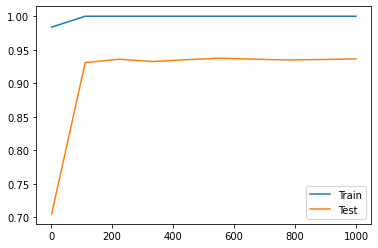

In [164]:
draw_learning_curve(param_values)

In [161]:
param_values = [int(x)for x in np.linspace(2,200,10)]

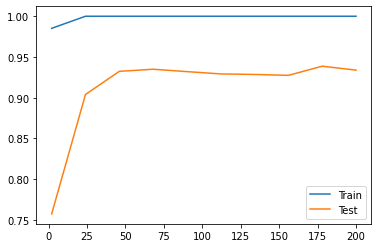

In [162]:
draw_learning_curve(param_values)

n_estimator = 175

## max_depth

In [165]:
def draw_learning_curve(param_values):
    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
    train_scores = []
    test_scores = []

    for c in param_values:
        model = RandomForestClassifier(n_estimators=175,max_depth=c)
        model.fit(X_train, y_train)

        # eval on train
        y_pred_train_proba = model.predict_proba(X_train)
        train_auc = roc_auc_score(y_train, y_pred_train_proba[:,1])
        train_scores.append(train_auc)

        # eval on test
        y_pred_proba = model.predict_proba(X_test)
        test_auc = roc_auc_score(y_test, y_pred_proba[:,1])
        test_scores.append(test_auc)

    plt.plot(param_values, train_scores, label='Train')
    plt.plot(param_values, test_scores, label='Test')
    plt.legend()
    plt.show()

In [166]:
param_values = [int(x)for x in np.linspace(2,1000,100)]

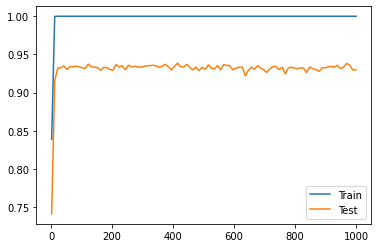

In [167]:
draw_learning_curve(param_values)

In [168]:
param_values = [int(x)for x in np.linspace(2,200,5)]

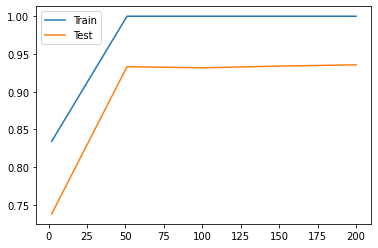

In [169]:
draw_learning_curve(param_values)

max_depth=50

## min_sample split

In [175]:
def draw_learning_curve(param_values):
    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
    train_scores = []
    test_scores = []

    for c in param_values:
        model = RandomForestClassifier(n_estimators=175,max_depth=50,min_samples_split=c)
        model.fit(X_train, y_train)

        # eval on train
        y_pred_train_proba = model.predict_proba(X_train)
        train_auc = roc_auc_score(y_train, y_pred_train_proba[:,1])
        train_scores.append(train_auc)

        # eval on test
        y_pred_proba = model.predict_proba(X_test)
        test_auc = roc_auc_score(y_test, y_pred_proba[:,1])
        test_scores.append(test_auc)

    plt.plot(param_values, train_scores, label='Train')
    plt.plot(param_values, test_scores, label='Test')
    plt.legend()
    plt.show()

In [176]:
param_values = [int(x)for x in np.linspace(2,1000,100)]

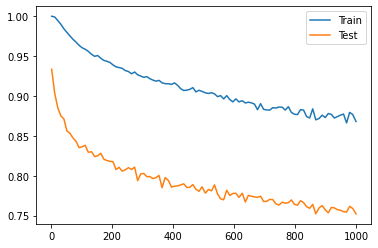

In [177]:
draw_learning_curve(param_values)

In [178]:
param_values = [int(x)for x in np.linspace(2,200,10)]

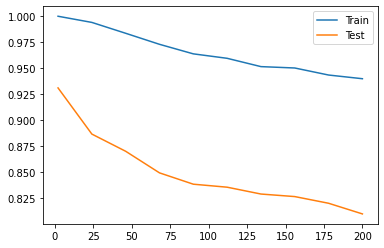

In [179]:
draw_learning_curve(param_values)

tidak usah dioptimize

## min_samples_leaf

In [170]:
def draw_learning_curve(param_values):
    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
    train_scores = []
    test_scores = []

    for c in param_values:
        model = RandomForestClassifier(n_estimators=175,max_depth=50,min_samples_leaf=c)
        model.fit(X_train, y_train)

        # eval on train
        y_pred_train_proba = model.predict_proba(X_train)
        train_auc = roc_auc_score(y_train, y_pred_train_proba[:,1])
        train_scores.append(train_auc)

        # eval on test
        y_pred_proba = model.predict_proba(X_test)
        test_auc = roc_auc_score(y_test, y_pred_proba[:,1])
        test_scores.append(test_auc)

    plt.plot(param_values, train_scores, label='Train')
    plt.plot(param_values, test_scores, label='Test')
    plt.legend()
    plt.show()

In [171]:
param_values = [int(x)for x in np.linspace(2,2000,10)]

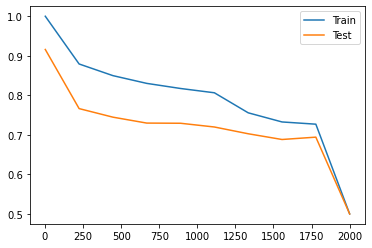

In [172]:
draw_learning_curve(param_values)

In [173]:
param_values = [int(x)for x in np.linspace(2,50,100)]

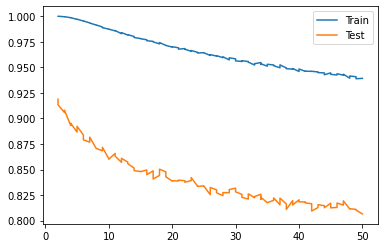

In [174]:
draw_learning_curve(param_values)

tidak usah dioptimize

Kesimpulan :

1. n_estimators optimum adalah 175
2. max_depth optimum adalah 50
3. min_samples_split dan min_samples_leaf memiliki kondisi optimum pada nilai yang kecil

In [190]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

n_estimators = [int(x) for x in np.linspace(start = 50, stop = 200, num = 10)]
max_features = ['auto', 'sqrt',None]
max_depth = [int(x) for x in np.linspace(2, 100, num = 10)]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
criterion = ['gini','entropy']

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
               'criterion':criterion}

rf = RandomForestClassifier()

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, cv = 10, scoring='roc_auc')
rf_random.fit(features_train, label_train)

print(rf_random.best_params_)

{'n_estimators': 66, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 56, 'criterion': 'gini', 'bootstrap': False}


In [191]:
pred_train = rf_random.predict(features_train)
pred_test = rf_random.predict(features_test)
pred_proba = rf_random.predict_proba(features_test)[:,1]

from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(np.array(label_train),  rf_random.predict_proba(features_train)[:,1])
auc_train_rf_random = metrics.auc(fpr,tpr)

fpr, tpr, _ = metrics.roc_curve(np.array(label_test),  rf_random.predict_proba(features_test)[:,1])
auc_test_rf_random = metrics.auc(fpr,tpr)
auc_overfitting_rf_random = auc_test_rf_random-auc_train_rf_random
print('AUC :',auc_test_rf_random*100,'%')
print('AUC overfitting :',auc_overfitting_rf_random*100,'%')

AUC : 94.82254633384858 %
AUC overfitting : -5.177453666151422 %


In [194]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

n_estimators = [int(x) for x in np.linspace(start = 50, stop = 100, num = 10)]
max_features = ['auto', 'sqrt',None]
max_depth = [int(x) for x in np.linspace(2, 200, num = 10)]
bootstrap = [True, False]
grid_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'bootstrap': bootstrap}

rf = RandomForestClassifier()

rf_grid = GridSearchCV(estimator = rf, param_grid = grid_grid, cv = 10, scoring='roc_auc')
rf_grid.fit(features_train, label_train)

print(rf_grid.best_params_)

{'bootstrap': False, 'max_depth': 68, 'max_features': 'auto', 'n_estimators': 94}


In [195]:
pred_train = rf_grid.predict(features_train)
pred_test = rf_grid.predict(features_test)
pred_proba = rf_grid.predict_proba(features_test)[:,1]

from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(np.array(label_train),  rf_grid.predict_proba(features_train)[:,1])
auc_train_rf_grid = metrics.auc(fpr,tpr)

fpr, tpr, _ = metrics.roc_curve(np.array(label_test),  rf_grid.predict_proba(features_test)[:,1])
auc_test_rf_grid = metrics.auc(fpr,tpr)
auc_overfitting_rf_grid = auc_test_rf_grid-auc_train_rf_grid
print('AUC :',auc_test_rf_grid*100,'%')
print('AUC overfitting :',auc_overfitting_rf_grid*100,'%')

AUC : 95.13858067675733 %
AUC overfitting : -4.861419323242677 %


In [199]:
rf_grid.best_estimator_

RandomForestClassifier(bootstrap=False, max_depth=68, n_estimators=94)

## Best Model

In [200]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(bootstrap=False, max_depth=68, n_estimators=94)

clf.fit(features_train,label_train)

pred_train = clf.predict(features_train)
pred_test = clf.predict(features_test)
pred_proba = clf.predict_proba(features_test)[:,1]


from sklearn.metrics import accuracy_score
accuracy_train_rf_best = accuracy_score(pred_train,label_train)
accuracy_test_rf_best = accuracy_score(pred_test,label_test)

from sklearn.metrics import precision_score
precision_train_rf_best = precision_score(pred_train,label_train)
precision_test_rf_best = precision_score(pred_test,label_test)

from sklearn.metrics import recall_score
recall_train_rf_best = recall_score(pred_train,label_train)
recall_test_rf_best = recall_score(pred_test,label_test)

from sklearn.metrics import f1_score
f1_train_rf_best = f1_score(pred_train,label_train)
f1_test_rf_best = f1_score(pred_test,label_test)

from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(np.array(label_train), clf.predict_proba(features_train)[:,1])
auc_train_rf_best = metrics.auc(fpr,tpr)

fpr, tpr, _ = metrics.roc_curve(np.array(label_test), clf.predict_proba(features_test)[:,1])
auc_test_rf_best = metrics.auc(fpr,tpr)
auc_overfitting_rf_best = auc_test_rf_best-auc_train_rf_best


print('AUC :',auc_test_rf_best*100,'%')
print('AUC overfitting :',auc_overfitting_rf_best*100,'%' )

AUC : 95.17378062778347 %
AUC overfitting : -4.826219372216533 %


# Feature Importance

In [210]:
#Split Train and Test Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=21)
X_train_col = X_train
X_test_col = X_test
#SMOTE
from imblearn.over_sampling import SMOTE 
smote = SMOTE()
X_train, y_train = smote.fit_resample(X_train, y_train)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

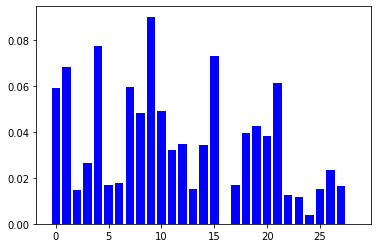

PreferredPropertyStar       0.090252
DurationOfPitch             0.077480
MonthlyIncome               0.073041
Age                         0.068168
Married                     0.061346
NumberOfFollowups           0.059595
CustomerID                  0.059220
NumberOfTrips               0.049377
ProductPitched              0.048202
Small Business              0.042605
Salaried                    0.039551
Divorced                    0.038236
PitchSatisfactionScore      0.034608
NumberOfChildrenVisiting    0.034138
Passport                    0.032137
CityTier                    0.026606
Manager                     0.023661
NumberOfPersonVisiting      0.017982
Large Business              0.016978
Gender                      0.016919
Senior Manager              0.016594
OwnCar                      0.015239
Executive                   0.015197
TypeofContact               0.014778
Single                      0.012463
Unmarried                   0.011839
AVP                         0.003787
F

In [211]:
feature=clf.feature_importances_
plt.bar(range(X_train.shape[1]),feature,color='blue',align='center')
plt.show()
feature_scores = pd.Series(clf.feature_importances_, index=X_train_col.columns).sort_values(ascending=False)
print(feature_scores)

# Evaluation

## Confusion Matrix

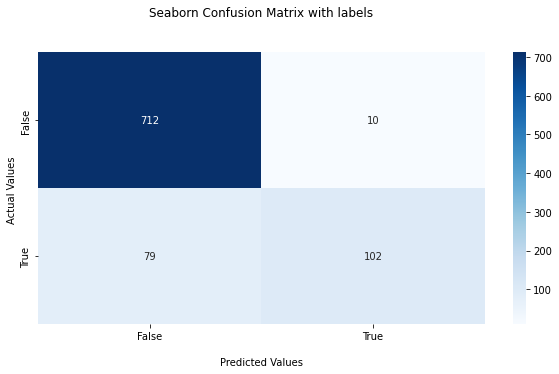

In [201]:
from sklearn.metrics import confusion_matrix
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.heatmap((confusion_matrix(label_test,pred_test)), annot=True, cmap='Blues', fmt='g')



ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])


## Display the visualization of the Confusion Matrix.
plt.show()

In [217]:
label_test

1794    0
2740    1
2176    1
3808    0
4098    0
       ..
753     0
3805    0
2830    0
2417    1
4661    0
Name: ProdTaken, Length: 903, dtype: int64

## Gain Curve

In [207]:
pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


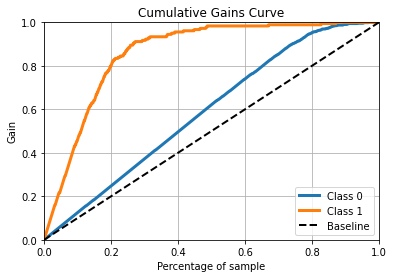

In [208]:
import scikitplot as skplt
probas = clf.predict_proba(X_test)
skplt.metrics.plot_cumulative_gain(y_test,y_probas =probas)
plt.show()

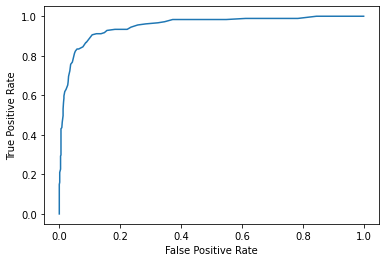

95.17378062778347 %


In [216]:
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
print(auc_test_rf_best*100,'%')

## Penghematan Biaya Marketing

In [253]:
biaya_menghubungi_customer = 100
total_sampel = 903
sampel_positif = 112
biaya_marketing = total_sampel*biaya_menghubungi_customer
biaya_marketing_model = sampel_positif*biaya_menghubungi_customer
penghematan_model = (1-(biaya_marketing_model)/biaya_marketing)
print(penghematan_model*100,'%')

87.59689922480621 %


In [256]:
X_test_col['y_pred'] = pred_test
X_test_col['y_test'] = label_test

In [258]:
data_revenue = X_test_col
data_revenue = data_revenue[(data_revenue['y_pred']==1)&(data_revenue['y_test']==1)]

In [250]:
df[df['ProdTaken']==1]['ProductPitched'].value_counts()

Basic           552
Deluxe          204
Standard        124
King             20
Super Deluxe     20
Name: ProductPitched, dtype: int64

In [254]:
total_revenue_conventional = 552*100+204*200+124*300+20*400+20*500
ROI_conventional = total_revenue_model/biaya_marketing
print(ROI_conventional*100,'%')

17.16500553709856 %


In [259]:
data_revenue['ProductPitched'].value_counts()

0    78
2    11
1    10
3     3
Name: ProductPitched, dtype: int64

In [260]:
total_revenue_model = 78*100+10*200+11*300+3*400
ROI_model = total_revenue_model/biaya_marketing_model
print(ROI_model*100,'%')

127.67857142857142 %
